## Predicting House Prices using a Neural Network

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from sklearn import preprocessing
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

2023-05-30 09:29:39.639480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(train_X,train_y),(test_X,test_y) = boston_housing.load_data()

Observation :
    Divide the dataset into training and testing dataset

In [4]:
df = pd.DataFrame(train_X)

Observation :
    create a dataframe of X_train columns

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


Print top 5 rows 

In [7]:
df.rename(columns={0: 'crim', 1: 'zn', 2: 'indus', 3: 'chas', 4: 'nox', 5: 'rm', 6: 'age', 7: 'dis', 8: 'rad', 9: 'tax', 10: 'ptratio', 11: 'b', 12: 'lstat'}, inplace=True)

Observation : Rename the datset with actual columns name

In [9]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


Observation :

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

Each record in the database describes a Boston suburb or town.


In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


Observation :
    
    - Data seems to numeric only.
    - There are around 13 columns.   
    - Expect 'chas' column each column has float values.

In [11]:
df.isnull()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,False,False,False,False,False,False,False,False,False,False,False,False,False
400,False,False,False,False,False,False,False,False,False,False,False,False,False
401,False,False,False,False,False,False,False,False,False,False,False,False,False
402,False,False,False,False,False,False,False,False,False,False,False,False,False


Observation :

    -There is no any null values founded in dataset.
    -Each and ever colums are notnull.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  b        404 non-null    float64
 12  lstat    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


Observation :

    -There is no any null values founded in dataset.
    -The data type of each column is float.

### EDA

In [13]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(13, 13)

<AxesSubplot:>

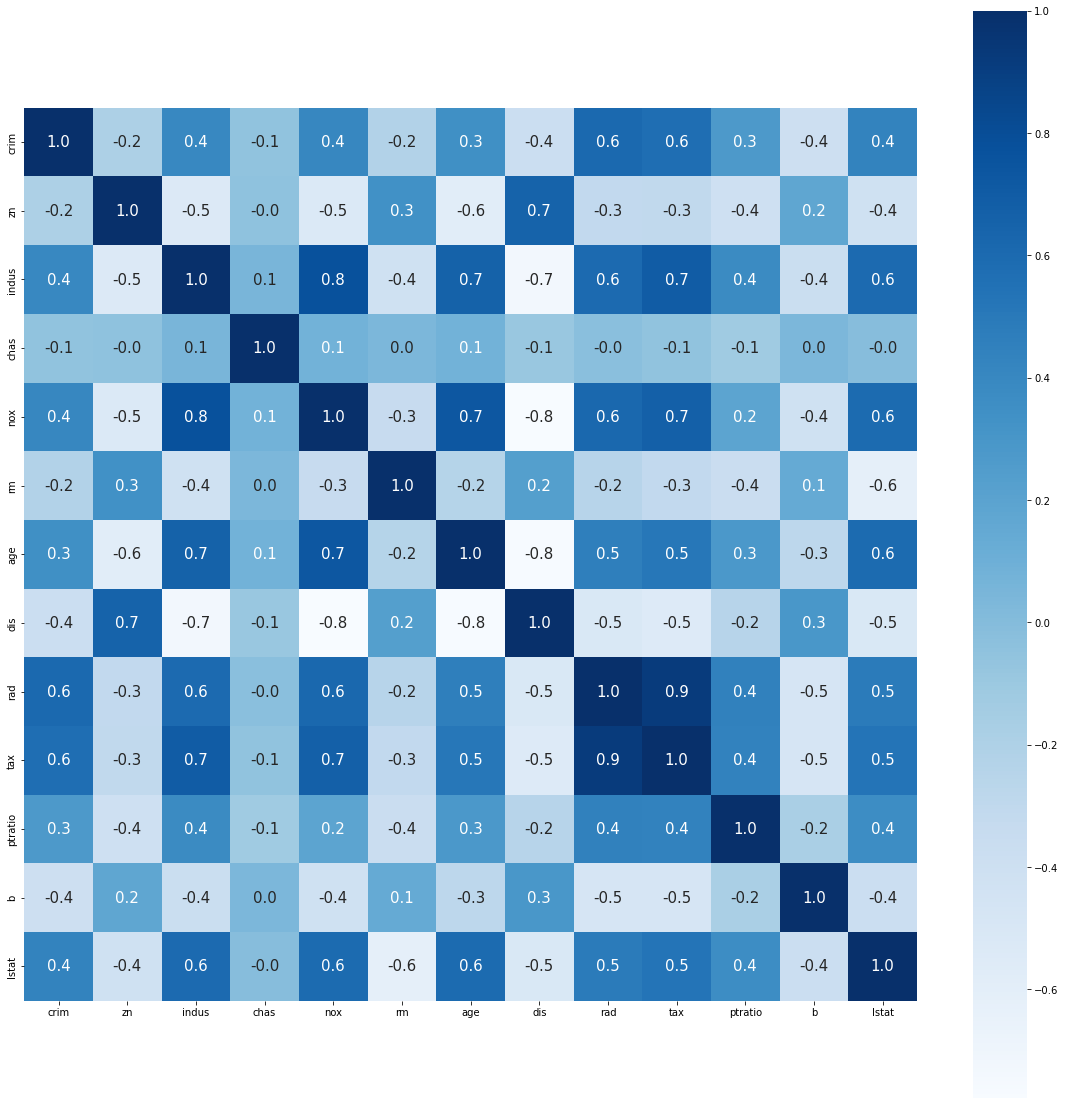

In [14]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

Observation : 
    
    -There is no any corelation founded between any columns it means each and every columns are needed.

Check outliers and impute them

/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='crim'>

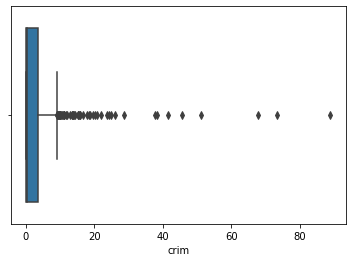

In [15]:
sns.boxplot(df['crim'])

Observation : 

    -There is outlier founded 'crim' column.

In [16]:
#for crim
import pandas as pd

column_mean = df['crim'].mean()

#Calculate the lower and upper bounds using the IQR method
Q1 = df['crim'].quantile(0.25)
Q3 = df['crim'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1 * IQR

#Replace outliers with the mean value
df.loc[(df['crim'] < lower_bound) | (df['crim'] > upper_bound), 'crim'] = column_mean


Observation :
    
    - Impute all outliers with mean value

/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ptratio'>

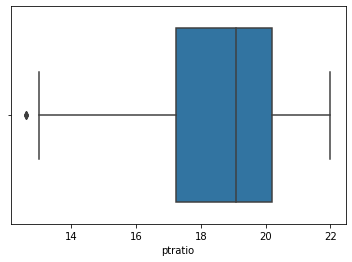

In [17]:
sns.boxplot(df['zn'])

Observation : 

    -There is outlier founded 'zn' column.

In [18]:
#for zn
import pandas as pd

column_mean = df['zn'].mean()

#Calculate the lower and upper bounds using the IQR method
Q1 = df['zn'].quantile(0.25)
Q3 = df['zn'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Replace outliers with the mean value
df.loc[(df['zn'] < lower_bound) | (df['zn'] > upper_bound), 'zn'] = column_mean


Observation :
    
    - Impute all outliers with mean value

/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='b'>

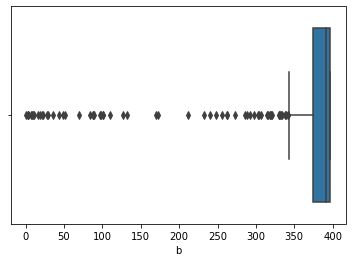

In [19]:
sns.boxplot(df['b'])

Observation : 

    -There is outlier founded 'b' column.

In [20]:
#for rm
import pandas as pd

column_mean = df['b'].mean()

#Calculate the lower and upper bounds using the IQR method
Q1 = df['b'].quantile(0.25)
Q3 = df['b'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Replace outliers with the mean value
df.loc[(df['b'] < lower_bound) | (df['b'] > upper_bound), 'b'] = column_mean


Observation :
    
    - Impute all outliers with mean value

### Neural network

In [21]:
print("Train shape : ",train_X.shape)
print("Train output: ",train_y.shape)

Train shape :  (404, 13)
Train output:  (404,)


Observation :
    
    - Print input data's shape
    - Print output data's shape
    

In [24]:
scaler = preprocessing.StandardScaler()

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

Observation :
    
    - Apply standardscaler on the dataset

In [25]:
train_X = preprocessing.normalize(train_X)
test_X = preprocessing.normalize(test_X)

Normalize is a function present in sklearn. preprocessing package. Normalization is used for scaling input data set on a scale of 0 to 1 to have unit norm. Norm is nothing but calculating the magnitude of the vector.

Observation :
    
    - Normalise the training and testing data.

In [26]:
train_X

array([[2.41189924e-03, 0.00000000e+00, 1.59296858e-02, ...,
        4.10962409e-02, 7.76718953e-01, 3.66343633e-02],
       [4.12788467e-05, 2.17679988e-02, 3.84915291e-03, ...,
        2.78731762e-02, 7.49693634e-01, 5.89697810e-03],
       [6.34505528e-03, 0.00000000e+00, 2.34463745e-02, ...,
        2.61666721e-02, 4.86441025e-01, 4.22293817e-03],
       ...,
       [7.31052735e-05, 2.42141666e-02, 1.27818222e-02, ...,
        3.56456758e-02, 7.64061896e-01, 1.65151267e-02],
       [3.93108288e-03, 0.00000000e+00, 3.58139396e-02, ...,
        2.68878913e-02, 6.48936821e-01, 2.88816193e-02],
       [3.11819960e-05, 2.48766844e-02, 6.34907911e-03, ...,
        3.38039707e-02, 8.16279215e-01, 9.49111484e-03]])

print training innput dataset

In [27]:
test_X

array([[2.67567471e-02, 0.00000000e+00, 2.67795319e-02, ...,
        2.98865495e-02, 4.03172511e-02, 4.29804090e-02],
       [2.07806276e-04, 0.00000000e+00, 1.68719346e-02, ...,
        3.00020416e-02, 6.65691367e-01, 2.73220840e-02],
       [1.19845746e-04, 0.00000000e+00, 1.13152524e-02, ...,
        4.40400960e-02, 8.65322480e-01, 2.12351750e-02],
       ...,
       [3.21889389e-03, 0.00000000e+00, 3.43696005e-02, ...,
        2.58035305e-02, 6.83898879e-01, 3.37025704e-03],
       [7.07644197e-04, 0.00000000e+00, 1.22522104e-02, ...,
        3.43852356e-02, 7.74063034e-01, 1.91885424e-02],
       [6.10350794e-03, 0.00000000e+00, 4.08709594e-02, ...,
        3.06845303e-02, 5.01305905e-01, 2.04772274e-02]])

print testing innput dataset

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

Import necessary libraries :
    
    - Tensorflow - TensorFlow is a Python library for fast numerical computing. It is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow.

    - Keras - What is Keras and Why it so Popular in 2021.Keras is used for creating deep models which can
    be productized on smartphones. Keras is also used for distributed training of deep learning models.

    - Sequential - A Sequential model is appropriate for a plain stack of layers where each layer has exactly
    one input tensor and one output tensor. A Sequential model is not appropriate when: Your model has multiple
    inputs or multiple outputs. Any of your layers has multiple inputs or multiple outputs.

In [30]:
def HousePricePredictionModel():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(train_X.shape[1],)))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse')
  return model

Observation : 
    
    - The model architecture consists of two layers. The first layer is a fully connected layer with 64 
      units and a ReLU activation function. 
    
    - The input shape of this layer is determined by the number of features in the training data. The second 
    layer is a single-unit output layer. The model is compiled with the mean squared error (MSE) loss function and the Adam optimizer. This configuration is suitable for regression tasks where the goal is to minimize the difference between the predicted house prices and the true prices. Overall, this code defines a simple 
    yet effective neural network model for house price prediction.

In [31]:
k=4
num_val_samples=len(train_X)
num_epochs=50
all_scores = []

Observation :
    
    - k=4: This line assigns the value 4 to the variable k, which represents the number of folds or subsets for performing cross-validation. In this case, the data will be split into 4 parts for training and validation.

    - num_val_samples=len(train_X): This line calculates the number of validation samples by taking the length of the train_X data, which represents the training dataset. The assumption is that the entire dataset will be used for validation in each fold of cross-validation.

    - num_epochs=50: This line assigns the value 50 to the variable num_epochs, which represents the number of epochs or complete passes through the training dataset during model training.

    - all_scores = []: This line initializes an empty list called all_scores, which will be used to store the evaluation scores (e.g., accuracy, loss) obtained from each fold of cross-validation.

In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

Observation : 
    
    - In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration

In [33]:
model = HousePricePredictionModel()
history = model.fit(x=train_X, y=train_y, epochs=num_epochs, batch_size=32, verbose=1, validation_data=(test_X, test_y),callbacks=early_stopping)

Epoch 1/50
13/13 [==============================] - 0s 8ms/step - loss: 579.9031 - val_loss: 603.5255
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 569.3771 - val_loss: 592.6832
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 558.7424 - val_loss: 581.5105
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 547.5420 - val_loss: 569.7731
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 535.7484 - val_loss: 557.2780
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 523.2731 - val_loss: 543.7213
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 509.6483 - val_loss: 529.2375
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 495.1812 - val_loss: 513.5512
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 479.4569 - val_loss: 496.9750
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 462.9281 

Observation : 
    
    - model = HousePricePredictionModel(): This line creates an instance of the house price prediction model 
    using the HousePricePredictionModel function defined earlier. The model architecture, optimizer, and 
    loss function are already set within the HousePricePredictionModel function.

    - history = model.fit(...): This line trains the model using the fit method. It specifies the training 
    data train_X and corresponding target labels train_y as input. Other parameters such as the number 
    of epochs, batch size, verbosity, and validation data (test_X and test_y) are also provided.

    - epochs=num_epochs: This parameter specifies the number of epochs or complete passes through the training 
    data during model training. It was previously defined as 50.

    - batch_size=32: This parameter specifies the number of samples to be processed in each training batch.
    Here, it is set to 32, which means the model will update its weights after processing 32 samples at a time.

    - verbose=1: This parameter controls the verbosity of the training process. Setting it to 1 means that 
    progress updates will be printed during training.

    - validation_data=(test_X, test_y): This parameter provides the validation data to evaluate the 
    model's performance after each epoch. It includes the test features test_X and the corresponding target 
    labels test_y.

    - callbacks=early_stopping: This parameter allows the use of callbacks during training. Here, the early_stopping callback is specified, which can monitor the validation loss and stop the training process early if the loss does not improve for a certain number of epochs.

### Model Evalution

In [34]:
test_X[2]

array([1.19845746e-04, 0.00000000e+00, 1.13152524e-02, 0.00000000e+00,
       1.12280443e-03, 1.30485136e-02, 9.89812059e-02, 1.04915718e-02,
       1.09010139e-02, 4.88365421e-01, 4.40400960e-02, 8.65322480e-01,
       2.12351750e-02])

Observation :

    - Take all inputs of 3 row.

In [35]:
test_y[2]

19.0

Observation :
    
    -Take output of 3 row.

In [36]:
test_input = [[0.02675675, 0.        , 0.02677953, 0.        , 0.0010046 ,0.00951931, 0.14795322, 0.0027145 , 0.03550877, 0.98536841,0.02988655, 0.04031725, 0.04298041]]
print("Actual output : 19")
print("Pridcted output : " ,model.predict(test_input))


Actual output : 19
1/1 [==============================] - 0s 59ms/step
Pridcted output :  [[18.63455]]


Observation : 
    
    - Predict a output using neural network.

# Gradio

In [37]:
!pip install gradio

Gradio is an open-source Python package that allows you to quickly create easy-to-use, customizable UI components for your ML model, any API, or even an arbitrary Python function using a few lines of code. You can integrate the Gradio GUI directly into your Jupyter notebook or share it as a link with anyone.

In [38]:
import gradio as gr

In [39]:
from sklearn.preprocessing import StandardScaler

In [44]:
import gradio as gr
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a scaler instance
scaler = StandardScaler()

# Dummy data for fitting the scaler
features = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]])

# Fit the scaler on the features
scaler.fit(features)

# Define the model architecture
def HousePricePredictionModel():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(13,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Define a function for making predictions
def predict_price(crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat):
    # Assuming crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, and lstat are available
    input_features = np.array([crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat])

    # Reshape the input features
    input_features = np.reshape(input_features, (1, -1))

    # Transform the input features using the fitted scaler
    scaled_features = scaler.transform(input_features)
    
    # Make predictions using the model
    prediction = model.predict(scaled_features)
    output = float(prediction[0])
    
    return output

# Define input interfaces using the new components API
inputs = [
    gr.inputs.Number(label='crim'),
    gr.inputs.Number(label='zn'),
    gr.inputs.Number(label='indus'),
    gr.inputs.Number(label='chas'),
    gr.inputs.Number(label='nox'),
    gr.inputs.Number(label='rm'),
    gr.inputs.Number(label='age'),
    gr.inputs.Number(label='dis'),
    gr.inputs.Number(label='rad'),
    gr.inputs.Number(label='tax'),
    gr.inputs.Number(label='ptratio'),
    gr.inputs.Number(label='b'),
    gr.inputs.Number(label='lstat')
]

# Define output interface using the new components API
output = gr.outputs.Textbox(label="Predicted Price")

# Create the Gradio interface
interface = gr.Interface(fn=predict_price, inputs=inputs, outputs=output, title="Predicting House Prices",
                         description="The goal is to predict the price of a house.", live=True)

# Launch the interface
interface.launch(share=True)


/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/gradio/blocks.py:255: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/gradio/blocks.py:255: UserWarning: api_name predict already exists

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://bbbdce5ec7e5cced10.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 10ms/step
